In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('customer_booking.csv', encoding='latin-1') # or encoding='ISO-8859-1'
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [6]:
print("Data preview:")
print(data.head())

Data preview:
   num_passengers sales_channel  trip_type  purchase_lead  length_of_stay  \
0               2      Internet  RoundTrip            262              19   
1               1      Internet  RoundTrip            112              20   
2               2      Internet  RoundTrip            243              22   
3               1      Internet  RoundTrip             96              31   
4               2      Internet  RoundTrip             68              22   

   flight_hour flight_day   route booking_origin  wants_extra_baggage  \
0            7        Sat  AKLDEL    New Zealand                    1   
1            3        Sat  AKLDEL    New Zealand                    0   
2           17        Wed  AKLDEL          India                    1   
3            4        Sat  AKLDEL    New Zealand                    0   
4           15        Wed  AKLDEL          India                    1   

   wants_preferred_seat  wants_in_flight_meals  flight_duration  \
0                

Data Preprocessing

In [7]:
categorical_cols = data.select_dtypes(include=["object"]).columns.tolist()

In [8]:
data_processed = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

In [12]:
print(data_processed.columns)

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration', 'booking_complete', 'sales_channel_Mobile',
       ...
       'booking_origin_Timor-Leste', 'booking_origin_Tonga',
       'booking_origin_Tunisia', 'booking_origin_Turkey',
       'booking_origin_Ukraine', 'booking_origin_United Arab Emirates',
       'booking_origin_United Kingdom', 'booking_origin_United States',
       'booking_origin_Vanuatu', 'booking_origin_Vietnam'],
      dtype='object', length=919)


In [13]:
X = data_processed.drop('booking_complete', axis=1)
y = data_processed['booking_complete']

In [14]:
print(X)

       num_passengers  purchase_lead  length_of_stay  flight_hour  \
0                   2            262              19            7   
1                   1            112              20            3   
2                   2            243              22           17   
3                   1             96              31            4   
4                   2             68              22           15   
...               ...            ...             ...          ...   
49995               2             27               6            9   
49996               1            111               6            4   
49997               1             24               6           22   
49998               1             15               6           11   
49999               1             19               6           10   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
0                        1                     0                      0   
1                    

In [15]:
print(y)

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: booking_complete, Length: 50000, dtype: int64


 Split the data into training and testing sets (80-20 split)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [17]:
print(X_train)

       num_passengers  purchase_lead  length_of_stay  flight_hour  \
39087               1             15               5           13   
30893               1            298               4            9   
45278               2            200               6            5   
16398               1             79              21           11   
13653               1            105              20            6   
...               ...            ...             ...          ...   
11284               1             20              91           11   
44732               1             65               6           18   
38158               2            107               5            6   
860                 4            232              19            8   
15795               1             11              26            2   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
39087                    0                     0                      1   
30893                

In [18]:
print(X_test)

       num_passengers  purchase_lead  length_of_stay  flight_hour  \
33553               2             47               4           15   
9427                1             46              85           14   
199                 1            132              20            9   
12447               1             58              18           23   
39489               2             50               5            5   
...               ...            ...             ...          ...   
28567               5             27               3           15   
25079               1             47              87            4   
18707               2             27              28            7   
15200               1              2              73            7   
5857                2             61              27            7   

       wants_extra_baggage  wants_preferred_seat  wants_in_flight_meals  \
33553                    1                     1                      0   
9427                 

In [19]:
print(y_train)

39087    0
30893    1
45278    0
16398    0
13653    0
        ..
11284    0
44732    0
38158    1
860      0
15795    0
Name: booking_complete, Length: 40000, dtype: int64


In [20]:
print(y_test)

33553    0
9427     0
199      0
12447    0
39489    0
        ..
28567    0
25079    0
18707    0
15200    0
5857     0
Name: booking_complete, Length: 10000, dtype: int64


RandomForest is chosen for its predictive performance and the ability to extract feature importances.

In [21]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Evaluate the model

In [22]:
y_pred = rf_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", acc)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy on the test set: 0.8559

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      8520
           1       0.55      0.13      0.21      1480

    accuracy                           0.86     10000
   macro avg       0.71      0.56      0.57     10000
weighted avg       0.82      0.86      0.82     10000



Extract and display feature importances

In [23]:
importances = rf_model.feature_importances_
features = X.columns

importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importances:")
print(importance_df.head(20))


Feature Importances:
                      Feature  Importance
1               purchase_lead    0.149851
3                 flight_hour    0.123106
2              length_of_stay    0.112705
0              num_passengers    0.047278
7             flight_duration    0.036175
865   booking_origin_Malaysia    0.028104
6       wants_in_flight_meals    0.023109
818  booking_origin_Australia    0.020557
5        wants_preferred_seat    0.017967
11             flight_day_Mon    0.017454
4         wants_extra_baggage    0.016878
15             flight_day_Tue    0.016735
16             flight_day_Wed    0.016690
14             flight_day_Thu    0.015954
13             flight_day_Sun    0.014945
12             flight_day_Sat    0.014498
8        sales_channel_Mobile    0.011446
733              route_PENTPE    0.007718
851  booking_origin_Indonesia    0.004969
22               route_AKLKUL    0.004841


Visualize feature importances

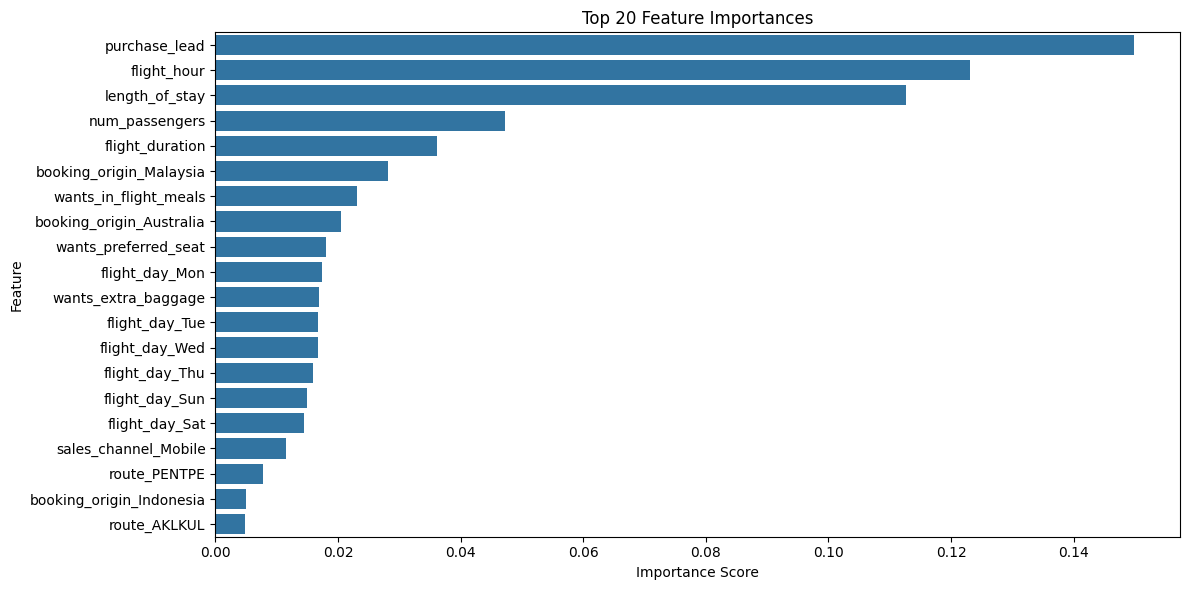

In [24]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title("Top 20 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()